In [1]:
import pandas as pd
import numpy as np
from scipy import stats


import matplotlib.pyplot as plt
import seaborn as sns
import explore

In [2]:
df = pd.read_csv('prepped_data.csv')
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,age,gender,race,date,city,state,zipcode,county,agency_responsible,cause_of_death,...,mental_illness,armed_unarmed_status,alleged_weapon,alleged_threat_lvl,fleeing,body_camera,geography,encounter_type_draft,initial_reported_reason_for_encounter_draft,known_past_shootings_of_Officer_draft
0,24,Male,Unknown Race,2021-05-09,Leicester,MA,1524.0,Worcester,Leicester Police Department,gunshot,...,no,Allegedly Armed,gun,attack,not fleeing,no,Suburban,other,deliberate car crash,0
1,52,Male,Unknown Race,2021-05-07,Rutledge,TN,37861.0,Grainger,"Bean Station Police Department, Rutledge Polic...",gunshot,...,no,Allegedly Armed,gun,attack,not fleeing,no,Rural,part 1 violent crime,shooting,0
2,47,Male,White,2021-05-06,San Andreas,CA,95249.0,Calaveras,Calaveras County Sheriff's Office,gunshot,...,no,Allegedly Armed,gun,other,not fleeing,no,Rural,part 1 violent crime,hostage situation,0
3,49,Male,White,2021-05-05,Las Vegas,NV,89104.0,Clark,Las Vegas Metropolitan Police Department,gunshot,...,no,Allegedly Armed,gun,attack,not fleeing,no,Urban,part 1 violent crime,shooting,0
4,30,Male,Black,2021-05-03,Biloxi,MS,39532.0,Harrison,Biloxi Police Department,gunshot,...,no,Allegedly Armed,gun,other,car,no,Suburban,part 1 violent crime,shooting,0


In [3]:
df.shape

(6624, 23)

In [4]:
df.isnull().sum()

age                                            0
gender                                         0
race                                           0
date                                           0
city                                           0
state                                          0
zipcode                                        0
county                                         0
agency_responsible                             0
cause_of_death                                 0
description_of_circumstances                   0
official_disposition                           0
criminal_charges_filed                         0
mental_illness                                 0
armed_unarmed_status                           0
alleged_weapon                                 0
alleged_threat_lvl                             0
fleeing                                        0
body_camera                                    0
geography                                      0
encounter_type_draft

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6624 entries, 0 to 6623
Data columns (total 23 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   age                                          6624 non-null   object 
 1   gender                                       6624 non-null   object 
 2   race                                         6624 non-null   object 
 3   date                                         6624 non-null   object 
 4   city                                         6624 non-null   object 
 5   state                                        6624 non-null   object 
 6   zipcode                                      6624 non-null   float64
 7   county                                       6624 non-null   object 
 8   agency_responsible                           6624 non-null   object 
 9   cause_of_death                               6624 non-null   object 
 10  

### Visualize if symptoms of mental illness play a role in threat level


In [6]:
#check mental_illness and target var threat level value_counts()
print("Mental Illness:")
print(df.mental_illness.value_counts())
print("---------------------------------")
print("Threat Level")
print(df.alleged_threat_lvl.value_counts())

Mental Illness:
no                     4409
yes                    1333
unknown                 702
drug or alcohol use     180
Name: mental_illness, dtype: int64
---------------------------------
Threat Level
attack          4248
other           2025
undetermined     349
none               1
Other              1
Name: alleged_threat_lvl, dtype: int64


In [7]:
df.alleged_threat_lvl = np.where(df['alleged_threat_lvl'].str.contains('Other'), "other", df.alleged_threat_lvl)
df.alleged_threat_lvl.value_counts()

attack          4248
other           2026
undetermined     349
none               1
Name: alleged_threat_lvl, dtype: int64

In [8]:
#drop undetermined and none col for now
#replace attack w/ 1 and other w/ 0
df.alleged_threat_lvl = df.alleged_threat_lvl.str.lower().replace('undetermined', np.nan).replace('none', np.nan).replace('attack', 1).replace('other', 0)


df.alleged_threat_lvl.value_counts()

1.0    4248
0.0    2026
Name: alleged_threat_lvl, dtype: int64

In [9]:
#drop nans
df.dropna(inplace=True)

In [10]:
#import train, test, split
from sklearn.model_selection import train_test_split

In [11]:
#function to split data
def split(df, stratify_by=None):
    """
    Crude train, validate, test split
    To stratify, send in a column name
    """
    
    if stratify_by == None:
        train, test = train_test_split(df, test_size=.2, random_state=123)
        train, validate = train_test_split(train, test_size=.3, random_state=123)
    else:
        train, test = train_test_split(df, test_size=.2, random_state=123, stratify=df[stratify_by])
        train, validate = train_test_split(train, test_size=.3, random_state=123, stratify=train[stratify_by])
    
    return train, validate, test

In [12]:
#split the data using the split function in prepare.py
train, validate, test = split(df, stratify_by="alleged_threat_lvl")

#check split datasets
print('overall shape of dataframe:', df.shape)
print('train:', train.shape)
print('validate:', validate.shape)
print('test:', test.shape)

#work w/ training data
train.head()

overall shape of dataframe: (6274, 23)
train: (3513, 23)
validate: (1506, 23)
test: (1255, 23)


,age,gender,race,date,city,state,zipcode,county,agency_responsible,cause_of_death,...,mental_illness,armed_unarmed_status,alleged_weapon,alleged_threat_lvl,fleeing,body_camera,geography,encounter_type_draft,initial_reported_reason_for_encounter_draft,known_past_shootings_of_Officer_draft
4090,54,Male,White,2017-06-07,Orrington,ME,4474.0,Penobscot,Maine State Police,gunshot,...,no,Allegedly Armed,gun,1.0,not fleeing,no,Rural,other,other (called in threats to law enforcement),0
3171,24,Male,White,2018-04-01,Covington,LA,70433.0,St. Tammany,St. Tammany Parish Sheriff's Office,gunshot,...,no,Allegedly Armed,gun,1.0,car,no,Suburban,traffic stop,suspect (vehicle burglaries),0
1656,38,Female,White,2019-09-30,Mountain View,MO,65548.0,Howell,Mountain View Police Department,gunshot,...,no,Vehicle,vehicle,1.0,car,no,Rural,traffic stop,traffic violation,0
5117,25,Male,Black,2016-06-23,Wauwatosa,WI,53225.0,Milwaukee,Wauwatosa Police Department,gunshot,...,no,Allegedly Armed,gun,0.0,not fleeing,yes,Suburban,part 1 violent crime,traffic violation,0
4678,45,Male,Hispanic,2016-11-22,La Mirada,CA,90638.0,Los Angeles,Los Angeles County Sheriff's Department,gunshot,...,no,Allegedly Armed,gun,1.0,not fleeing,no,Suburban,part 1 violent crime,traffic violation,0


In [13]:
print("Mental Illness:")
print(train.mental_illness.value_counts())
print("---------------------------------")
print("Threat Level")
print(train.alleged_threat_lvl.value_counts())

Mental Illness:
no                     2314
yes                     742
unknown                 368
drug or alcohol use      89
Name: mental_illness, dtype: int64
---------------------------------
Threat Level
1.0    2378
0.0    1135
Name: alleged_threat_lvl, dtype: int64


<AxesSubplot:xlabel='mental_illness', ylabel='count'>

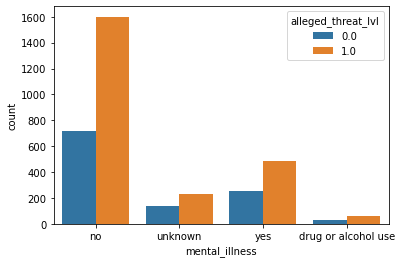

In [14]:
sns.countplot(data=train, x='mental_illness', hue='alleged_threat_lvl')

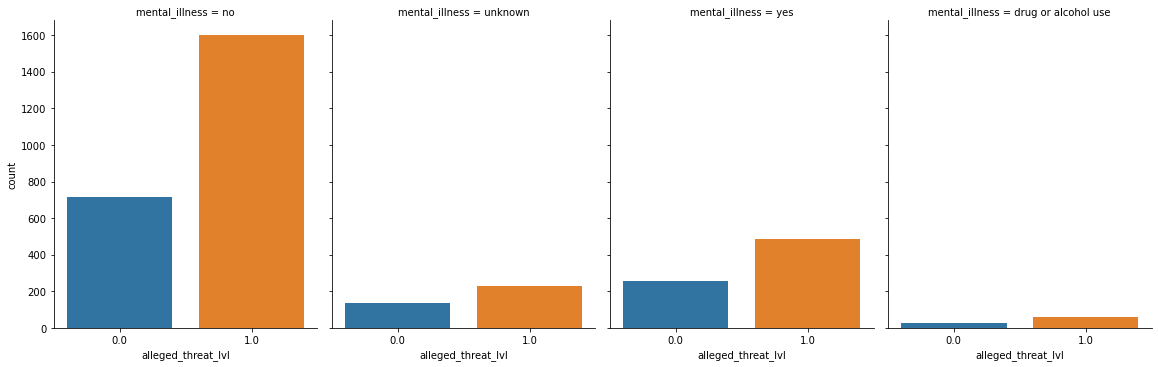

In [15]:
g = sns.catplot(x="alleged_threat_lvl", col="mental_illness", col_wrap=4,
                data=train,
                kind="count", height=5, aspect=.8)

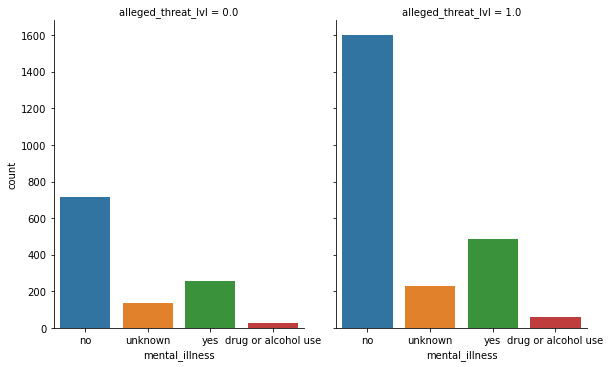

In [16]:
g = sns.catplot(x="mental_illness", col="alleged_threat_lvl", col_wrap=4,
                data=train,
                kind="count", height=5, aspect=.8)

### Takeaways
- people w/ no mental illness have been characterized as having an 'attack' threat level more often than not being attackers
- there are alot more attacks/non-attacks overall for people not characterized as having a mental illnesses

In [17]:
#hyp testing: Visualize if symptoms of mental illness play a role in threat level
#this is a 2-sample t-test b/c comparing the means of 2 subgroups
#this is also 2 tailed t-test b/c checking for any difference btwn the means (regardless of direction)

#Setup
null_hypothesis = "there is no difference in threat level for people with or without mental illness."
alternative_hypothesis = "there is a difference in threat level for people with or without mental illness."
#confidence_level = .95
#alpha = 1 - confidence_level
alpha = .05

with_mi = train[train["mental_illness"] == 'yes'].alleged_threat_lvl
without_mi = train[train["mental_illness"] == 'no'].alleged_threat_lvl
without_mi = train[train["mental_illness"] == 'unknown'].alleged_threat_lvl
without_mi = train[train["mental_illness"] == 'drug or alcohol use'].alleged_threat_lvl

In [18]:
from scipy import stats

In [19]:
#.ttest_ind test of independence b/c 2 sample t-test 
t, p = stats.ttest_ind(with_mi, without_mi)

In [20]:
if p < alpha:
    print("We reject the null hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")

We fail to reject the null hypothesis


### Takeaway
- T-test failed to reject the null hypothesis meaning there is not enough evidence to support the alternative. 

In [21]:
#running chi2 instead b/c categorical vars
explore.chi2(train, 'mental_illness', 'alleged_threat_lvl', alpha=0.05)

Observed

[[  28   61]
 [ 714 1600]
 [ 137  231]
 [ 256  486]]
---
Expected

[[  28.75462568   60.24537432]
 [ 747.62026758 1566.37973242]
 [ 118.89553089  249.10446911]
 [ 239.72957586  502.27042414]]
---

chi^2 = 7.9667
p     = 0.0467

Because the p-value: 0.0467 is less than alpha: 0.05, we can reject the null hypothesis


### Takeaway
- Chi^2 rejected the null hypothesis meaning we accept that mental status is dependent on alleged threat level.


<AxesSubplot:xlabel='race', ylabel='count'>

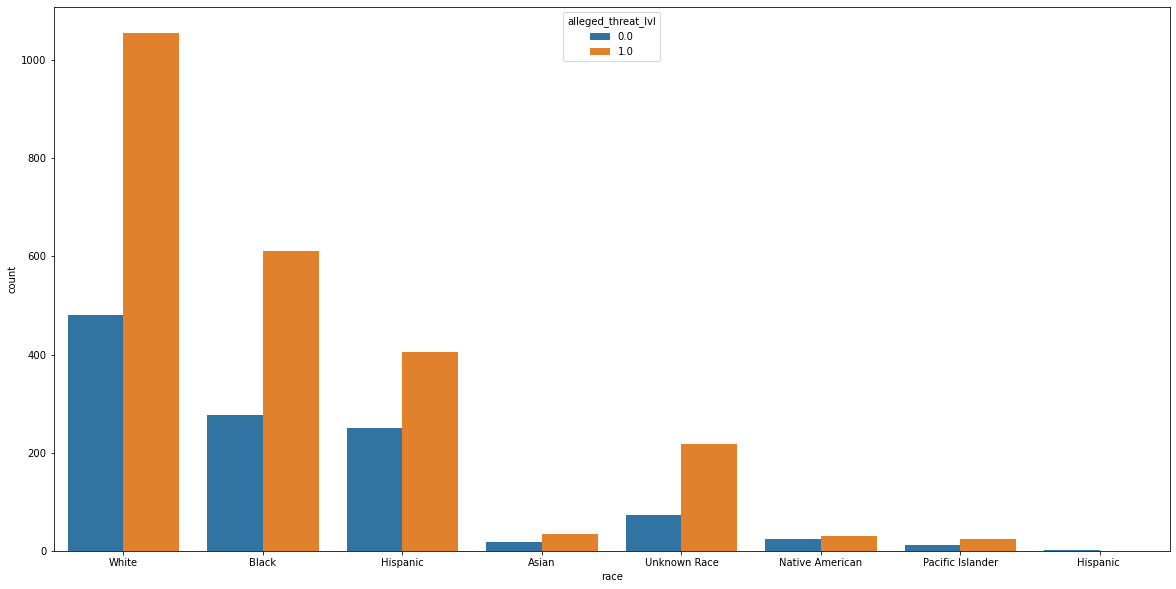

In [22]:
#visualize race vs alleged threat level
plt.figure(figsize=(20, 10))
sns.countplot(data=train, x='race', hue='alleged_threat_lvl')

### Takeaways
- It appears as though all races are more often attacks than not
- White race shows the most attackers/non-attackers
- Black and hispanic race that result in non-attack threat level are almost at same level. 
- Asian, Native American, and Pacific Islander races have the least amount of attack/non-attack threat levels.

In [23]:
train.race.value_counts()

White               1535
Black                886
Hispanic             655
Unknown Race         291
Native American       56
Asian                 53
Pacific Islander      36
Hispanic               1
Name: race, dtype: int64

In [24]:
import explore

In [25]:
explore.chi2(train, 'race', 'alleged_threat_lvl', alpha=0.05)

Observed

[[  18   35]
 [ 276  610]
 [ 250  405]
 [   1    0]
 [  25   31]
 [  12   24]
 [  73  218]
 [ 480 1055]]
---
Expected

[[1.71235411e+01 3.58764589e+01]
 [2.86253914e+02 5.99746086e+02]
 [2.11621122e+02 4.43378878e+02]
 [3.23085682e-01 6.76914318e-01]
 [1.80927982e+01 3.79072018e+01]
 [1.16310845e+01 2.43689155e+01]
 [9.40179334e+01 1.96982067e+02]
 [4.95936521e+02 1.03906348e+03]]
---

chi^2 = 24.5969
p     = 0.0009

Because the p-value: 0.0009 is less than alpha: 0.05, we can reject the null hypothesis


### Takeaway
- Chi^2 rejected the null hypothesis meaning we accept that race is dependent on alleged threat level.

In [26]:
#trying nlp
import re
import unicodedata
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

In [27]:
nlp_explore = train[['description_of_circumstances', 'alleged_threat_lvl']]
nlp_explore

,description_of_circumstances,alleged_threat_lvl
4090,Mark Ellis allegedly threatened police on the ...,1.0
3171,"About 5 a.m., deputies attempted to pull over ...",1.0
1656,"At approximately 11:30 p.m., an officer initia...",1.0
5117,Little has been released about this death. App...,0.0
4678,Deputies received a call about a robbery in pr...,1.0
...,...,...
4021,Police shot and killed Stephanie Lopez and inj...,1.0
2064,Derrec Shaw allegedly shot two people in midto...,1.0
2237,Daniel Moncada's parents called police to repo...,1.0
81,Police responded around 6:30 p.m. to a report ...,0.0


In [28]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
    '''
    This function cleans up text data.
    '''
    
    #lemmatize
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    
    #normalize
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    
    return ' '.join([wnl.lemmatize(word) for word in words if word not in stopwords])

In [29]:
#nlp_explore = nlp_explore.description_of_circumstances.apply(clean)

In [30]:
#nlp_explore

In [31]:
#check how many words appear for each threat level and percentage
threats = pd.concat([train.alleged_threat_lvl.value_counts(),
                    round(train.alleged_threat_lvl.value_counts(normalize=True), 2)], axis=1)

threats.columns = ['n', 'percent']

threats

,n,percent
1.0,2378,0.68
0.0,1135,0.32


In [32]:
#breaking up data into each threat level

#words that appear attacks
attack_words = clean(' '.join(nlp_explore[nlp_explore.alleged_threat_lvl == 1.0].description_of_circumstances))

#words that appear in non-attacks
nonattack_words = clean(' '.join(nlp_explore[nlp_explore.alleged_threat_lvl == 0.0].description_of_circumstances))

#all of the words 
all_words = clean(' '.join(nlp_explore.description_of_circumstances))

In [34]:
#check how often each of the words occurs
attack_freq = pd.Series(attack_words.split()).value_counts()
nonattack_freq = pd.Series(nonattack_words.split()).value_counts()
all_freq = pd.Series(all_words.split()).value_counts()

print('attack:')
print(attack_freq)
print('--------------------------')
print('nonattack:')
print(nonattack_freq)
print('--------------------------')
print('All:')
print(all_freq)

attack:
officer     3182
police      2917
shot        2533
killed      1802
deputy      1308
            ... 
bandon         1
samara         1
hammond        1
unused         1
eviction       1
Length: 6888, dtype: int64
--------------------------
nonattack:
officer        1448
police         1364
shot           1076
killed          879
man             664
               ... 
200               1
humberto          1
minniefield       1
gap               1
wrongdoing        1
Length: 4600, dtype: int64
--------------------------
All:
officer       4630
police        4281
shot          3609
killed        2681
man           1926
              ... 
millimeter       1
lapds            1
racetrac         1
rally            1
weighed          1
Length: 8729, dtype: int64


In [35]:
#combine frequencies together to get one resulting df
word_counts = (pd.concat([all_freq, 
                          attack_freq, 
                          nonattack_freq], axis=1, sort=True)
                .set_axis(['All', 
                           'attack', 
                           'nonattack'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8729 entries, 1 to zyon
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   All        8729 non-null   int64
 1   attack     8729 non-null   int64
 2   nonattack  8729 non-null   int64
dtypes: int64(3)
memory usage: 272.8+ KB


In [36]:
word_counts.head()

,All,attack,nonattack
1,41,30,11
10,68,46,22
100,6,5,1
1005,1,0,1
1009,1,1,0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=258e71fc-cf2b-48c3-8461-70ecd9787aa1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>